sgd方法：
Iteration	loss
0		24.37904561
1		23.812524553
2		23.268790528
3		22.7395270911
4		22.2232927591
5		21.6965823026
6		21.1978837542
7		20.7911739926
8		20.392406474
9		20.0014246606
10		19.6180751145
11		19.2422074364
12		18.8004469397
13		18.3784987552
14		18.0265708136
15		17.6042076361
16		17.2035902216
17		16.8133417174
18		16.409922666
19		16.0958336895
20		15.7878703987
21		15.4294207167
22		15.0728348209
23		14.7149387332
24		14.3752268244
25		14.1002730777
26		13.7719176582
27		13.5085790189
28		13.1911544111
29		12.8760724217
30		12.5874454016
31		12.2978194098
32		12.0030314443
33		11.7188999952
34		11.450566422
35		11.1829644184
36		10.9243913919
37		10.671456201
38		10.4671336269
39		10.2219489874
40		9.98802044839
41		9.74408949952
42		9.50454878279
43		9.27372920159
44		9.06068812065
45		8.88677785972
46		8.68085337327
47		8.46942675463
48		8.26680047872
49		8.0835336168
50		7.88575639034
51		7.7014423044
52		7.5531752893
53		7.40780887093
54		7.23153778228
55		7.092

43		1.41654604868
44		1.10881207839
45		0.291958117597
46		1.35124087941
47		1.02057803033
48		2.05550454407
49		1.57837738457
50		1.22510088478
51		0.956522893078
52		0.528721440678
53		0.893021210087
54		0.64438348147
55		0.770690399327
56		0.553886599894
57		1.26955883046
58		0.932039708364
59		0.708177338449
60		1.75592017296
61		1.36472584199
62		1.07409044749
63		0.308688637899
64		1.21791946949
65		2.21072378459
66		1.71913046478
67		0.607919942846
68		0.590833334213
69		0.843152490456
70		0.566917287334
71		1.5835483258
72		0.725678495594
73		1.60648386475
74		1.2017730283
75		0.914200190011
76		1.92512513932
77		1.49974353535
78		1.18133964145
79		0.936397719454
80		0.744131538166
81		1.93784950222
82		1.4892819606
83		1.15320086537
84		0.459337934369
85		1.11720173945
86		0.508719371764
87		1.17548473216
88		2.19631825303
89		1.06362788138
90		0.942712581966
91		2.12695227996
92		1.56632723162
93		2.34659723738
94		1.16059281564
95		2.08739855027
96		1.17881004336
97		0.86276

79		1.61927637334
80		1.77648699582
81		1.88433797967
82		1.94322184052
83		1.95695901801
84		1.8240901165
85		1.68110484335
86		1.42572770178
87		1.19124434149
88		0.976645211011
89		0.720939140572
90		0.545813529619
91		0.474868533608
92		0.457908211723
93		0.482075474862
94		0.491727454569
95		0.558937425101
96		0.614587945614
97		0.630564241689
98		0.700694443346
99		0.807570315371
100		0.901173130425
101		0.981553049008
102		1.04799346809
103		1.17601687074
104		1.36679756314
105		1.48371812895
106		1.56380295672
107		1.60321123043
108		1.60178307895
109		1.62802893337
110		1.71649483176
111		1.7229574967
112		1.64540034
113		1.63225482408
114		1.59576432996
115		1.61580711019
116		1.70003432009
117		1.68981799313
118		1.66639039272
119		1.62650930981
120		1.5689848072
121		1.49451338775
122		1.40531958072
123		1.22053403092
124		1.04266722536
125		0.788816690017
126		0.663753205722
127		0.497137679499
128		0.436678318186
129		0.459559733318
130		0.533045185453
131		0.700157588137

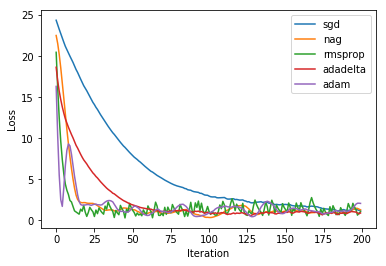

In [9]:
from sklearn import datasets as ds
import numpy as np
from numpy import random
import matplotlib.pyplot as plt


def train(x_train, y_train, x_test, y_test, method, iters, test_errors):
    max_iterations = 200
    w = random.rand(num_features + 1)
    num_test_samples, num_test_features = x_test.shape
    
    #随机梯度下降原始版本
    if method == 'sgd':
        lr = 0.01

        for i in range(max_iterations):
            output = np.dot(x_train[i], w)
            #grad = max(0, 1 - y_train[i] * output) * (-y_train[i] * x_train[i]) + w
            if(1 - y_train[i] * output>=0):
                grad=(-y_train[i] * x_train[i]) + w
            else:
                grad= w                
            
            w = w - lr * grad

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = np.dot(x_test[j], w)
                predict_error += max(0, predict_output * y_test[j]) + 0.5 * np.dot(w, w)
            print(str(i) + '\t\t' + str(predict_error / num_test_samples))

            iters.append(i)
            test_errors.append(predict_error / num_test_samples)
    
    #nag方法优化
    if method == 'nag':
        lr = 0.01
        gamma = 0.9
        momentum = np.zeros(num_features + 1)

        for i in range(max_iterations):
            output = np.dot(x_train[i], w - gamma * momentum)
            #grad = max(0, 1 - y_train[i] * output) * (-y_train[i] * x_train[i]) + w
            if(1 - y_train[i] * output>=0):
                grad=(-y_train[i] * x_train[i]) + w
            else:
                grad= w  
            momentum = momentum * gamma + lr * grad
            
            w = w - momentum

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = np.dot(x_test[j], w)
                predict_error += max(0, predict_output * y_test[j]) + 0.5 * np.dot(w, w)
            print(str(i) + '\t\t' + str(predict_error / num_test_samples))

            iters.append(i)
            test_errors.append(predict_error / num_test_samples)
     
    #rmsprop方法优化
    if method == 'rmsprop':
        lr = 0.1
        Gt = 1
        gamma = 0.9
        epsilon = 10e-7

        for i in range(max_iterations):
            output = np.dot(x_train[i], w)
            #grad = max(0, 1 - y_train[i] * output) * (-y_train[i] * x_train[i]) + w
            if(1 - y_train[i] * output>=0):
                grad=(-y_train[i] * x_train[i]) + w
            else:
                grad= w  
                
            norm = grad * grad
            Gt = gamma * Gt + (1 - gamma) * norm
            w = w - lr * grad / (np.sqrt(Gt + epsilon))

            predict_error = 0
            for j in range(num_test_samples):
                predict_output = np.dot(x_test[j], w)
                predict_error += max(0, predict_output * y_test[j]) + 0.5 * np.dot(w, w)
            print(str(i) + '\t\t' + str(predict_error / num_test_samples))
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)
    
    #adam方法优化
    if method == 'adam':
        epsilon = 10e-8
        beta = 0.9
        gama = 0.999
        lr = 0.1
        m = 0
        Gt = 0
        

        for i in range(max_iterations):
            output = np.dot(x_train[i], w)
            #grad = max(0, 1 - y_train[i] * output) * (-y_train[i] * x_train[i]) + w
            if(1 - y_train[i] * output>=0):
                grad=(-y_train[i] * x_train[i]) + w
            else:
                grad= w  
                
            m = beta * m + (1 - beta) * grad
            Gt = gama * Gt + (1 - gama) * grad * grad
            m_hat = m / (1 - beta)
            Gt_hat = Gt / (1 - gama)
            delta_w = (-lr * m_hat) / (np.sqrt(Gt_hat) + epsilon)
            w = w + delta_w
     
            predict_error = 0
            for j in range(num_test_samples):
                predict_output = np.dot(x_test[j], w)
                predict_error += max(0, predict_output * y_test[j]) + 0.5 * np.dot(w, w)
            print(str(i) + '\t\t' + str(predict_error / num_test_samples))
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)
    
    #adadelta方法优化
    if method == 'adadelta':
        Gt = 0
        delta_t = 0
        gamma = 0.95
        epsilon = 10e-7
        lr = 10

        for i in range(max_iterations):
            output = np.dot(x_train[i], w)
            #grad = max(0, 1 - y_train[i] * output) * (-y_train[i] * x_train[i]) + w
            if(1 - y_train[i] * output>=0):
                grad=(-y_train[i] * x_train[i]) + w
            else:
                grad= w  
                
            Gt = gamma * Gt + (1 - gamma) * grad * grad
            delta_w = ( -lr * grad * np.sqrt(delta_t + epsilon)) / (np.sqrt(Gt + epsilon))
            w = w + delta_w
            delta_t = gamma * delta_t + (1 - gamma) * delta_t * delta_t


            predict_error = 0
            for j in range(num_test_samples):
                predict_output = np.dot(x_test[j], w)
                predict_error += max(0, predict_output * y_test[j]) + 0.5 * np.dot(w, w)
            print(str(i) + '\t\t' + str(predict_error / num_test_samples))
            iters.append(i)
            test_errors.append(predict_error / num_test_samples)

def main():
    x_train, y_train = ds.load_svmlight_file('a9a.txt')
    x_test, y_test = ds.load_svmlight_file('a9a.t.txt')

    num_samples, num_features = x_train.shape
    num_test_samples, num_test_features = x_test.shape

    x_train = x_train.toarray()
    temp = np.ones(shape=[32561, 1], dtype=np.float32)
    x_train = np.concatenate([x_train, temp], axis=1)
    x_test = x_test.toarray()
    temp = np.zeros(shape=[16281, 1], dtype=np.float32)
    temp1 = np.ones(shape=[16281, 1], dtype=np.float32)
    x_test = np.concatenate([x_test, temp, temp1], axis=1)


    methods = ['sgd', 'nag', 'rmsprop', 'adadelta', 'adam']
    for method in methods:
        iters = []
        test_errors = []
        print(method+"方法：")
        print("Iteration"+'\t'+"loss")
        train(x_train, y_train, x_test, y_test, method, iters, test_errors)
        plt.plot(iters, test_errors, label=method)

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
main()